# Week 12

## Supervised machine learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# Let's start of with a simple one: weather

In [2]:
weather = ['Sunny', 'Sunny', 'Cloudy', 'Rainy', 'Rainy', 'Rainy', 'Cloudy', 'Sunny', 'Sunny', 'Rainy', 'Sunny',
           'Cloudy', 'Overcast', 'Rainy']
temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [3]:
le = preprocessing.LabelEncoder()

In [4]:
weather_encoded = le.fit_transform(weather)

In [5]:
temp_encoded = le.fit_transform(temp)
label = le.fit_transform(play)

In [6]:
features = list(zip(weather_encoded, temp_encoded))
print(features)

[(3, 1), (3, 1), (0, 1), (2, 2), (2, 0), (2, 0), (0, 0), (3, 2), (3, 0), (2, 2), (3, 2), (0, 2), (1, 1), (2, 2)]


K-Nearest Neighbor(KNN) Classifier

In [7]:
knn = KNeighborsClassifier()

In [8]:
knn.fit(features, label)

KNeighborsClassifier()

In [9]:
predicted = knn.predict(
    ([[3, 2]]))  # look into the arrays to see what 3 (feature) and 2 (label) after transforming means
print(predicted)  # 0 means no

[0]


## Let's try another one using imported data

In [10]:
fruits = pd.read_table('fruit.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [11]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [12]:
print(fruits.shape)

(59, 7)


In [13]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


In [14]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [15]:
import seaborn as sns
#sns.countplot(fruits['fruit_name'], label='Count')
#plot.show()

Training and testing datasets

In [16]:
X = fruits[['mass', 'width', 'height']]
Y = fruits['fruit_label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=0)  # 'X' is upper case and 'y' is lower case normally

In [18]:
X_train.describe()  # the count is way less because not all data goes into the train data

,mass,width,height
count,47.000000,47.000000,47.000000
mean,160.170213,7.061702,7.661702
std,51.830543,0.814956,1.329196
min,76.000000,5.800000,4.000000
25%,131.000000,6.250000,7.250000
50%,158.000000,7.200000,7.600000
75%,176.000000,7.500000,8.200000
max,356.000000,9.200000,10.500000


In [19]:
from mpl_toolkits.mplot3d import Axes3D

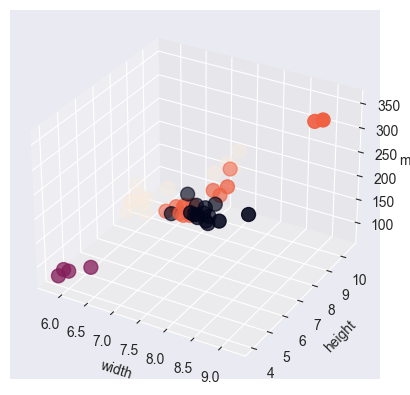

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['mass'], c=y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('mass')
plt.show()

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
knn.score(X_test, y_test)

0.5833333333333334

In [23]:
look_up_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
print(look_up_fruit_name)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [24]:
fruit_prediction = knn.predict([[20, 6, 5.5]])
look_up_fruit_name[fruit_prediction[0]]

C:\Users\sonja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

Let's try using other data

In [25]:
from sklearn import datasets

In [26]:
iris = datasets.load_iris()

In [27]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [28]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [30]:
iris_df = pd.DataFrame(
    {'sepal length': iris.data[:, 0], 'sepal width': iris.data[:, 1], 'petal length': iris.data[:, 2],
     'petal width': iris.data[:, 3], 'species': iris.target})

In [31]:
# iris_df

In [32]:
x = iris_df.iloc[:, :-1]  # from the beginning but without the last one
y = iris_df.iloc[:, -1]  # just the last one (not from the beginning)

In [33]:
x.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)  # 'X' is upper case and 'y' is lower case normally

In [35]:
x_train.describe()

,sepal length,sepal width,petal length,petal width
count,120.000000,120.000000,120.000000,120.000000
mean,5.880833,3.053333,3.815833,1.231667
std,0.850437,0.431907,1.784904,0.775354
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.500000,3.300000,5.200000,1.900000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
knn = KNeighborsClassifier(
    n_neighbors=3)  # if you change the number of neighbours the result after that might differ (e.g. 7 -> accuracy changes to 1.0)
# more neighbours isn't always better though! It really depends on the data, if its more clustered then less neighbours might be better,
# usually you do a seperate calculation to determine the number of neighbours that are best
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [38]:
print(accuracy_score(y_test, y_pred))

0.9666666666666667
